In [143]:
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
import pandas as pd 
import numpy as np 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from IPython.display import display
from matplotlib.pyplot import figure, show
from numpy import arange, sin, pi
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [144]:
#load csv file into data frame
animal_df = pd.read_csv('train.csv')
animal_df.shape

(26729, 10)

In [145]:
#drop animalID
animal_df.drop(['AnimalID'], axis=1, inplace=True)
animal_df.shape

(26729, 9)

In [146]:
#keep only data for cats
animal_df = animal_df[~animal_df['AnimalType'].isin(['Dog'])]
animal_df.shape

(11134, 9)

In [147]:
# Giving numerical values to our label
def categorical_to_numeric(x):
    if x == 'Return_to_owner':
        return 0
    elif x == 'Euthanasia':
        return 1
    elif x == 'Adoption':
        return 2
    elif x == 'Transfer':
        return 3
    
animal_df['OutcomeType'] = animal_df['OutcomeType'].apply(categorical_to_numeric).astype(np.float32)
animal_df.head()

,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
1,Emily,2013-10-13 12:44:00,1.0,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
3,NaN,2014-07-11 19:09:00,3.0,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
6,Jimmy,2015-03-28 13:11:00,3.0,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Tabby
7,NaN,2015-04-30 17:02:00,3.0,Partner,Cat,Unknown,3 weeks,Domestic Shorthair Mix,Brown Tabby
10,NaN,2013-12-05 15:50:00,3.0,SCRP,Cat,Unknown,2 years,Domestic Shorthair Mix,Black


In [148]:
#Convert date time to single columns for year, month, day
datetime = pd.to_datetime(animal_df['DateTime']).dt
animal_df['Year'] = datetime.year
animal_df['Month'] = datetime.month
animal_df['Day'] = datetime.day
animal_df.drop(['DateTime', 'AnimalType'], axis=1, inplace=True)
animal_df.head()

,Name,OutcomeType,OutcomeSubtype,SexuponOutcome,AgeuponOutcome,Breed,Color,Year,Month,Day
1,Emily,1.0,Suffering,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,2013,10,13
3,NaN,3.0,Partner,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,2014,7,11
6,Jimmy,3.0,Partner,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Tabby,2015,3,28
7,NaN,3.0,Partner,Unknown,3 weeks,Domestic Shorthair Mix,Brown Tabby,2015,4,30
10,NaN,3.0,SCRP,Unknown,2 years,Domestic Shorthair Mix,Black,2013,12,5


In [149]:
# fill in the NaN with 0s
animal_df['Name'] = animal_df['Name'].fillna(0)

# change names to numeric values
for names in animal_df['Name']:
    if isinstance(names, str) and not 0:
        animal_df['Name'].replace(names, '1', inplace=True)
animal_df['Name'] = animal_df['Name'].astype(int)
animal_df.dropna(inplace= True)
animal_df.head()

,Name,OutcomeType,OutcomeSubtype,SexuponOutcome,AgeuponOutcome,Breed,Color,Year,Month,Day
1,1,1.0,Suffering,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,2013,10,13
3,0,3.0,Partner,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,2014,7,11
6,1,3.0,Partner,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Tabby,2015,3,28
7,0,3.0,Partner,Unknown,3 weeks,Domestic Shorthair Mix,Brown Tabby,2015,4,30
10,0,3.0,SCRP,Unknown,2 years,Domestic Shorthair Mix,Black,2013,12,5


In [150]:
#Convert age to weeks
def change_year_month_to_weeks(x):
    count, parse_age = x.split(" ")
    if parse_age == 'month':
        return int(4)
    elif parse_age == 'months':
        return 4 * int(count)
    elif parse_age == 'year':
        return int(52)
    elif parse_age == 'years':
        return 52 * int(count)
    elif parse_age == 'week':
        return int(count)
    elif parse_age == 'weeks':
        return int(count)
    
animal_df['AgeuponOutcome'] = animal_df['AgeuponOutcome'].apply(change_year_month_to_weeks).astype(np.float32)

animal_df.head()

,Name,OutcomeType,OutcomeSubtype,SexuponOutcome,AgeuponOutcome,Breed,Color,Year,Month,Day
1,1,1.0,Suffering,Spayed Female,52.0,Domestic Shorthair Mix,Cream Tabby,2013,10,13
3,0,3.0,Partner,Intact Male,3.0,Domestic Shorthair Mix,Blue Cream,2014,7,11
6,1,3.0,Partner,Intact Male,3.0,Domestic Shorthair Mix,Blue Tabby,2015,3,28
7,0,3.0,Partner,Unknown,3.0,Domestic Shorthair Mix,Brown Tabby,2015,4,30
10,0,3.0,SCRP,Unknown,104.0,Domestic Shorthair Mix,Black,2013,12,5


In [151]:
#ONE HOT ENCODE categorical data
to_convert = ['OutcomeSubtype','SexuponOutcome', 'Breed', 'Color']

for col in to_convert:
    dummies = pd.get_dummies(animal_df[col])
    animal_df[dummies.columns] = dummies
    
animal_df.shape

(7357, 197)

In [152]:
animal_df.dropna(inplace = True)

#show any null values left
print(animal_df.isnull().sum())

Name                       0
OutcomeType                0
OutcomeSubtype             0
SexuponOutcome             0
AgeuponOutcome             0
Breed                      0
Color                      0
Year                       0
Month                      0
Day                        0
Aggressive                 0
Barn                       0
Foster                     0
Medical                    0
Offsite                    0
Partner                    0
Rabies Risk                0
SCRP                       0
Suffering                  0
Intact Female              0
Intact Male                0
Neutered Male              0
Spayed Female              0
Unknown                    0
American Shorthair Mix     0
Angora Mix                 0
Balinese Mix               0
Bengal Mix                 0
Bombay Mix                 0
British Shorthair Mix      0
                          ..
Torbie/Brown               0
Torbie/White               0
Tortie                     0
Tortie Point  

In [153]:
y = animal_df['OutcomeType']

y.shape

(7057,)

In [154]:
# Dropping Non-numerical columns and our label column:
animal_df.drop(['SexuponOutcome','OutcomeType','OutcomeSubtype','Breed','Color'], axis=1, inplace=True)

X = animal_df

X.head()

,Name,AgeuponOutcome,Year,Month,Day,Aggressive,Barn,Foster,Medical,Offsite,...,White/Brown Tabby,White/Calico,White/Chocolate Point,White/Cream,White/Cream Tabby,White/Gray,White/Lynx Point,White/Orange,White/Orange Tabby,White/White
1,1,52.0,2013,10,13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,3.0,2014,7,11,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,3.0,2015,3,28,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,3.0,2015,4,30,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,104.0,2013,12,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [155]:
# Splitting the dataset into testing and training:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

print("X_Train size: " + str(X_train.shape))
print("y_train size: " + str(y_train.shape))
print("X_Test size: " + str(X_test.shape))
print("y_test size: " + str(y_test.shape))

X_Train size: (5645, 192)
y_train size: (5645,)
X_Test size: (1412, 192)
y_test size: (1412,)


In [156]:
#Instantiated Random Forest Classifier
my_RandomForest = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=2)
# Training on the training set:
my_RandomForest.fit(X_train, y_train)
# Testing on the testing set:
y_predict_rf = my_RandomForest.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_predict_rf)

print("Random Forest accuracy: " + str(rf_accuracy))

Random Forest accuracy: 0.9985835694050992


In [157]:
# Dont display Numpy in scientific notation
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

# Numpy perdictions:

get_prob = my_RandomForest.predict_proba(X_test)
print("Perdictions from Random Forest: ")
print(y_predict_rf)

print("As a percent probablity: ")
display(y_predict_rf[0:5])

logloss_score = metrics.log_loss(y_test, get_prob)

# print("Y_test: " + str(y_test.shape))

# print("Y_predict: " + str(y_predict_rf.shape))

print("Log Loss score: " + str(logloss_score))

Perdictions from Random Forest: 
[3. 3. 3. ... 3. 3. 3.]
As a percent probablity: 


array([3., 3., 3., 3., 3.], dtype=float32)

Log Loss score: 0.025160113779031195


Text(0.5,1,'log(x)')

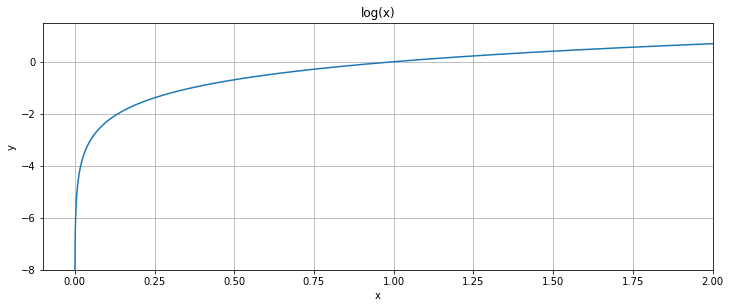

In [158]:
t = arange(1e-5, 5.0, 0.00001)

graph = figure(1, figsize=(12,10))

axis = graph.add_subplot(211)

axis.plot(t, np.log(t))

axis.grid(True)

axis.set_ylim(-8,1.5)
axis.set_xlim(-0.1,2)
axis.set_xlabel('x')
axis.set_ylabel('y')
axis.set_title('log(x)')

In [159]:
# Testing out KNN Classifier on Dog Data up 10 neighbors:
for i in range(1, 11):
    knn_animal = KNeighborsClassifier(n_neighbors = i)
    knn_animal.fit(X_train, y_train)
    y_predict_knn = knn_animal.predict(X_test)

    knn_accuracy = accuracy_score(y_test, y_predict_knn)

    print("KNN Accuracy for  " + str(i) + " neighbors " + str(knn_accuracy))

KNN Accuracy for  1 neighbors 0.876770538243626
KNN Accuracy for  2 neighbors 0.8498583569405099
KNN Accuracy for  3 neighbors 0.8611898016997167
KNN Accuracy for  4 neighbors 0.8604815864022662
KNN Accuracy for  5 neighbors 0.8526912181303116
KNN Accuracy for  6 neighbors 0.8569405099150141
KNN Accuracy for  7 neighbors 0.8449008498583569
KNN Accuracy for  8 neighbors 0.8548158640226629
KNN Accuracy for  9 neighbors 0.8413597733711048
KNN Accuracy for  10 neighbors 0.8427762039660056


In [160]:
decision_tree_animal = DecisionTreeClassifier()
decision_tree_animal.fit(X_train, y_train)
y_predict_decision_tree = decision_tree_animal.predict(X_test)

dt_accuracy = accuracy_score(y_test, y_predict_decision_tree)

print("Decision Tree Accuracy: " + str(dt_accuracy))

Decision Tree Accuracy: 1.0


In [161]:
my_AdaBoost = AdaBoostClassifier(n_estimators = 19,random_state=2)
my_AdaBoost.fit(X_train, y_train)
y_predict_ada = my_AdaBoost.predict(X_test)
score_ada = accuracy_score(y_test, y_predict_ada)

# calculating the final accuracy of AdaBoost Classifier
print("AdaBoost Classifier Accuracy: " + str(score_ada))

AdaBoost Classifier Accuracy: 0.9079320113314447


In [162]:
my_ANN = MLPClassifier(hidden_layer_sizes=(100,), activation= 'logistic', 
                       solver='adam', alpha=1e-5, random_state=1, 
                       learning_rate_init = 0.002)

# Training on Training set
my_ANN.fit(X_train, y_train)

# Testing on the testing set:
y_predict_ann = my_ANN.predict(X_test)
#print(y_predict_ann)
# We can now compare the "predicted labels" for the Testing Set with its "actual labels" to evaluate the accuracy 
score_ann = accuracy_score(y_test, y_predict_ann)

print("ANN Accuracy: " + str(score_ann))

ANN Accuracy: 0.9992917847025495


In [163]:
# Instantiating Non_Linear SVM
my_nonLinear_SVM = SVC(C=1, kernel='rbf', gamma=0.0005, random_state=1, probability=True)

my_nonLinear_SVM.fit (X_train, y_train)

# Testing on the testing set:
y_predict_nlsvm = my_nonLinear_SVM.predict(X_test)

# We can now compare the "predicted labels" for the Testing Set with its "actual labels" to evaluate the accuracy 
score_nlsvm = accuracy_score(y_test, y_predict_nlsvm)

print("Accuracy of Non-Linear SVM: " + str(score_nlsvm))

Accuracy of Non-Linear SVM: 0.876770538243626
